# Language Detection Project

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## 1-Importing data that we scrapped from twitter

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None  
df = pd.read_csv('language_detection_data.csv',index_col=None)
df

,Text,Language
0,\n@ZoltanTV\n @TwitterFrance\n et \n@Police...,French
1,@TwitterFrance\n c8,French
2,\n@SanaRyuk\n @alirabeh\n et 3 autres person...,French
3,\n@SoBusyDear\nIl faudrait inventer la possib...,French
4,\n@entreplume\n @PaulineLanglo15\n et \n@le...,French
...,...,...
13148,Marsh\n@DistortedKeys\n·\n2 avr. 2016En répons...,Darija
13149,Manal Amir (IA)\n@ManalManal93\n·\n27 mars 201...,Darija
13150,Manal Amir (IA)\n@ManalManal93\n·\n27 mars 201...,Darija
13151,Rania\n@ranaa_rania\n·\n25 mars 2016En réponse...,Darija


## 2-Exploring our dataset

In [3]:
#shape
df.shape

(13153, 2)

In [4]:
#different languages
languages = set(df['Language'])
print('Languages', languages)


Languages {'English', 'Darija', 'French'}


In [5]:
#check missing values
df.isnull().sum()

Text        0
Language    0
dtype: int64

In [6]:
#display the number of texts available  of every class (language)
df['Language'].value_counts()

French     4530
Darija     4384
English    4239
Name: Language, dtype: int64

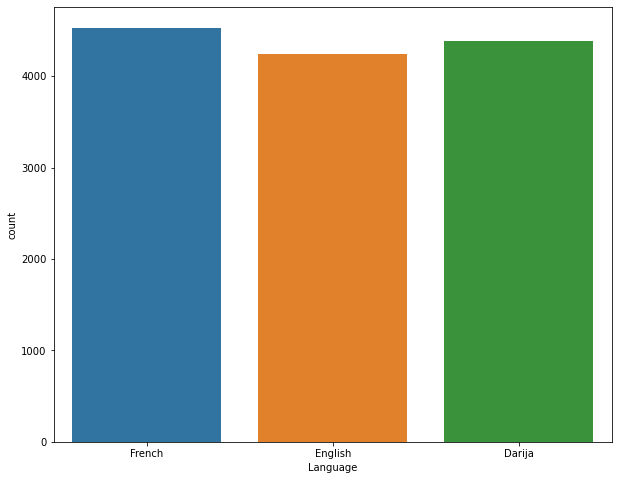

In [9]:
#we can see that our data is balanced
plt.figure(figsize = (10, 8))
sns.countplot(x=df['Language'])
plt.show()

Note: We see that our dataset is almost balanced

## 3- Data Pre-Processing

In [7]:
#Text Cleaning library
import neattext.functions as nfx
#text cleaning fct
def Clean_Text(data,column):
     #convert text to lower
    data[column]=data[column].str.lower()
    #replace \n and s with space
    data[column].replace(r'\s+|\\n', ' ',regex=True, inplace=True) 
    #remove userhandles
    data[column]=data[column].apply(nfx.remove_userhandles)
    #remove urls
    data[column]=data[column].apply(nfx.remove_urls)
    #remove punctuations
    data[column]=data[column].apply(nfx.remove_punctuations)
    #remove special characters
    data[column]=data[column].apply(nfx.remove_special_characters)
    #remove emails
    data[column]=data[column].apply(nfx.remove_emails)
    #remove multiple space
    data[column]=data[column].apply(nfx.remove_multiple_spaces)
    #replace dates 1-2digits Mon 4digits
    data[column].replace(r'\d{1,2}\s(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec|janv|juil|aot|janvier|février|mars|avril|mai|juin|juillet|août|septembre|octobre|novembre|décembre|January|February|March|April|May|June|July|August|September|October|November|December|avr|déc|févr|janv|juill|nov|oct|sept)\s\d{4}', ' ',regex=True, inplace=True) 
    data[column].replace("(janv|\dh| h | \d |\d | \d|http|https|a35crasherait| d24d1minfriendly| \d+ \d+| \d+\d+)", "", regex=True, inplace=True)
    data[column].replace("  ", " ",regex=True, inplace=True)
    data[column].replace(r'(autres personnes|en rponse|rponse|en|[a-z][0-9][0-9][a-z]+|[0-9][0-9]+|[0,1,4,6,8]+|[0,1,4,6,8]+|[a-z][0,1,4,6,8])', ' ', regex=True, inplace=True)
    data[column].replace(r'avren|decn|fevren|janven|juilen|noven|octen|septen|avr|déc|févr|janv|juil|nov|oct|sept', ' ', regex=True, inplace=True)
    #replace / 
    data[column].replace('\/', ' ',regex=True, inplace=True)
    #replace '
    data[column].replace('\'', ' ', regex=True, inplace=True)
    return data

In [8]:
dataset=Clean_Text(df,'Text')
dataset

,Text,Language
0,et imagine ce que ress t cest vraim t des mal...,French
1,,French
2,et compte cybercriminel depuis plusieurs ann...,French
3,il faudrait inv ter la possibilit de disliker...,French
4,et fait cest un troll de collard il critiqu...,French
...,...,...
13148,marsh l3assir,Darija
13149,manal amir ia hhhhheti l3assir,Darija
13150,manal amir ia ah ma3rofin w mzyan wtana dok ...,Darija
13151,rania ouiitahom l3assir msaykon b9a fih l7al...,Darija


In [9]:
#Remove english and french stop words
import nltk
stopwords = set(nltk.corpus.stopwords.words('english')) | set(nltk.corpus.stopwords.words('french'))
dataset['Text'] = dataset['Text'].str.lower().apply(lambda x: ' '.join([word for word in str(x).split() if word not in stopwords]))

In [10]:
#delete empty rows
dataset = dataset[dataset['Text']!= '']
#reset data index
dataset=dataset.reset_index().drop('index',axis=1)
dataset

,Text,Language
0,imagine ress cest vraim malades taux g,French
1,compte cybercriminel depuis plusieurs annes ra...,French
2,faudrait inv ter possibilit disliker tweet occ...,French
3,fait cest troll collard critique zemmour disan...,French
4,cest trolling base fait g ragiss faut signaler...,French
...,...,...
12231,marsh l3assir,Darija
12232,manal amir ia hhhhheti l3assir,Darija
12233,manal amir ia ah ma3rofin w mzyan wtana dok m3...,Darija
12234,rania ouiitahom l3assir msaykon b9a fih l7al t...,Darija


extract_keywords function was created In order to determine the manipulating voccabulary of each language

In [11]:
from collections import Counter
def extract_keywords(text,num=50):
    tokens=[tok for tok in text.split()]
    most_commen_tokens=Counter(tokens).most_common(num)
    return dict(most_commen_tokens)

### i- Dominant voccabulary in Darija

In [12]:
#extraction of Darija keywords
language_list=dataset['Language'].unique().tolist()
Darija_list=dataset[dataset['Language']=='Darija']['Text'].tolist()
Darija_docx=' '.join(Darija_list)
keywords_Darija=extract_keywords(Darija_docx)
keywords_Darija

{'khoya': 1140,
 'l3assir': 722,
 'wa3r': 676,
 'smi9li': 278,
 'hai': 246,
 'mrbou7a': 224,
 'f': 190,
 'w': 160,
 'li': 150,
 'b': 117,
 'ana': 113,
 'ki': 99,
 'dial': 99,
 'cest': 98,
 'rah': 80,
 'wa3': 79,
 'chi': 76,
 'mn': 73,
 'ya': 73,
 'ko': 73,
 'k': 68,
 'bhi': 66,
 'nahi': 64,
 'ghir': 63,
 'allah': 61,
 'kan': 59,
 'el': 57,
 'mein': 57,
 'nta': 56,
 'm3a': 55,
 'ka': 53,
 'merci': 53,
 'wa': 52,
 'jai': 52,
 'kya': 52,
 'khoy': 51,
 'ra': 50,
 'jo': 49,
 'dak': 48,
 'bi': 48,
 'ke': 48,
 'dyal': 47,
 'hada': 47,
 'stop': 47,
 'bach': 46,
 'l3assi': 46,
 'plus': 45,
 'tih': 45,
 'na': 44,
 'tha': 44}

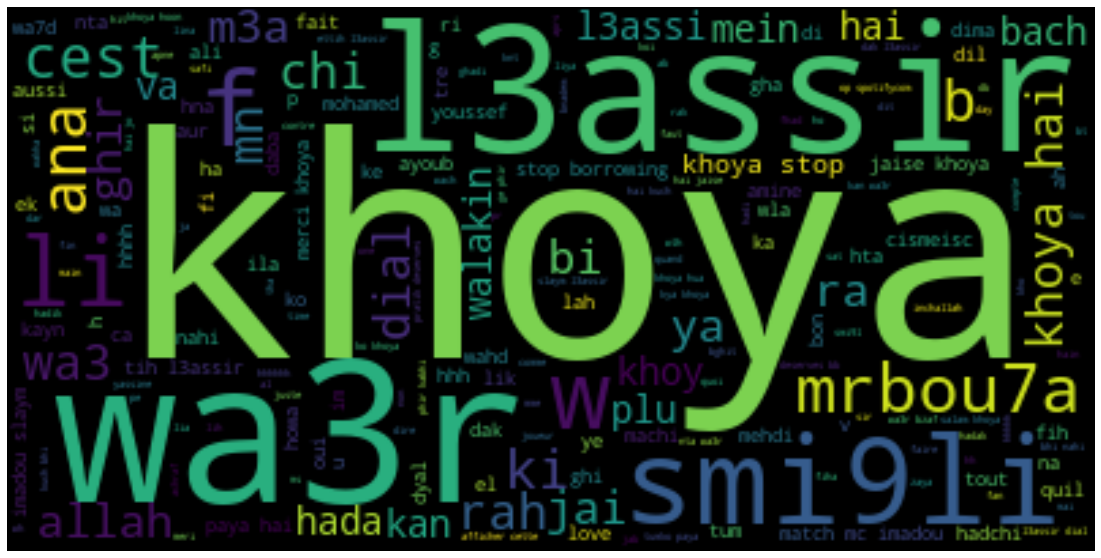

In [16]:
#Word Cloud
from wordcloud import WordCloud
def plot_wordcloud(docx):
    mywordcloud=WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()
plot_wordcloud(Darija_docx) 

To perform a deeper data cleanning, we tokenize our text into a set of separated words

In [13]:
import nltk
dataset['tokenized_sents'] = dataset.apply(lambda row: nltk.word_tokenize(row['Text']), axis=1)
dataset

,Text,Language,tokenized_sents
0,imagine ress cest vraim malades taux g,French,"[imagine, ress, cest, vraim, malades, taux, g]"
1,compte cybercriminel depuis plusieurs annes ra...,French,"[compte, cybercriminel, depuis, plusieurs, ann..."
2,faudrait inv ter possibilit disliker tweet occ...,French,"[faudrait, inv, ter, possibilit, disliker, twe..."
3,fait cest troll collard critique zemmour disan...,French,"[fait, cest, troll, collard, critique, zemmour..."
4,cest trolling base fait g ragiss faut signaler...,French,"[cest, trolling, base, fait, g, ragiss, faut, ..."
...,...,...,...
12231,marsh l3assir,Darija,"[marsh, l3assir]"
12232,manal amir ia hhhhheti l3assir,Darija,"[manal, amir, ia, hhhhheti, l3assir]"
12233,manal amir ia ah ma3rofin w mzyan wtana dok m3...,Darija,"[manal, amir, ia, ah, ma3rofin, w, mzyan, wtan..."
12234,rania ouiitahom l3assir msaykon b9a fih l7al t...,Darija,"[rania, ouiitahom, l3assir, msaykon, b9a, fih,..."


In [14]:
#remove words with less that 3 letters
def cleaner(dataset):
    for sentence in dataset.tokenized_sents:
        for token in sentence:
            if len(token) < 3  :
                sentence.remove(token)
    return dataset
dataset=cleaner(dataset)
dataset

,Text,Language,tokenized_sents
0,imagine ress cest vraim malades taux g,French,"[imagine, ress, cest, vraim, malades, taux]"
1,compte cybercriminel depuis plusieurs annes ra...,French,"[compte, cybercriminel, depuis, plusieurs, ann..."
2,faudrait inv ter possibilit disliker tweet occ...,French,"[faudrait, inv, ter, possibilit, disliker, twe..."
3,fait cest troll collard critique zemmour disan...,French,"[fait, cest, troll, collard, critique, zemmour..."
4,cest trolling base fait g ragiss faut signaler...,French,"[cest, trolling, base, fait, ragiss, faut, sig..."
...,...,...,...
12231,marsh l3assir,Darija,"[marsh, l3assir]"
12232,manal amir ia hhhhheti l3assir,Darija,"[manal, amir, hhhhheti, l3assir]"
12233,manal amir ia ah ma3rofin w mzyan wtana dok m3...,Darija,"[manal, amir, ah, ma3rofin, mzyan, wtana, dok,..."
12234,rania ouiitahom l3assir msaykon b9a fih l7al t...,Darija,"[rania, ouiitahom, l3assir, msaykon, b9a, fih,..."


In [15]:
#After successfully removing noise from our tokenze we detokenize the sentences
from nltk.tokenize.treebank import TreebankWordDetokenizer
dataset['detokenized_sents'] = dataset.apply(lambda row: TreebankWordDetokenizer().detokenize(row['tokenized_sents']), axis=1)
dataset=dataset[dataset['detokenized_sents'].str.len()>=4]
dataset

,Text,Language,tokenized_sents,detokenized_sents
0,imagine ress cest vraim malades taux g,French,"[imagine, ress, cest, vraim, malades, taux]",imagine ress cest vraim malades taux
1,compte cybercriminel depuis plusieurs annes ra...,French,"[compte, cybercriminel, depuis, plusieurs, ann...",compte cybercriminel depuis plusieurs annes ra...
2,faudrait inv ter possibilit disliker tweet occ...,French,"[faudrait, inv, ter, possibilit, disliker, twe...",faudrait inv ter possibilit disliker tweet occ...
3,fait cest troll collard critique zemmour disan...,French,"[fait, cest, troll, collard, critique, zemmour...",fait cest troll collard critique zemmour disan...
4,cest trolling base fait g ragiss faut signaler...,French,"[cest, trolling, base, fait, ragiss, faut, sig...",cest trolling base fait ragiss faut signaler c...
...,...,...,...,...
12231,marsh l3assir,Darija,"[marsh, l3assir]",marsh l3assir
12232,manal amir ia hhhhheti l3assir,Darija,"[manal, amir, hhhhheti, l3assir]",manal amir hhhhheti l3assir
12233,manal amir ia ah ma3rofin w mzyan wtana dok m3...,Darija,"[manal, amir, ah, ma3rofin, mzyan, wtana, dok,...",manal amir ah ma3rofin mzyan wtana dok m3rofin...
12234,rania ouiitahom l3assir msaykon b9a fih l7al t...,Darija,"[rania, ouiitahom, l3assir, msaykon, b9a, fih,...",rania ouiitahom l3assir msaykon b9a fih l7al t...


In [16]:
dataset[['detokenized_sents','Language']]

,detokenized_sents,Language
0,imagine ress cest vraim malades taux,French
1,compte cybercriminel depuis plusieurs annes ra...,French
2,faudrait inv ter possibilit disliker tweet occ...,French
3,fait cest troll collard critique zemmour disan...,French
4,cest trolling base fait ragiss faut signaler c...,French
...,...,...
12231,marsh l3assir,Darija
12232,manal amir hhhhheti l3assir,Darija
12233,manal amir ah ma3rofin mzyan wtana dok m3rofin...,Darija
12234,rania ouiitahom l3assir msaykon b9a fih l7al t...,Darija


In [19]:
#Word Cloud
from wordcloud import WordCloud
def plot_wordcloud(docx):
    mywordcloud=WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    
    
    plt.show()   

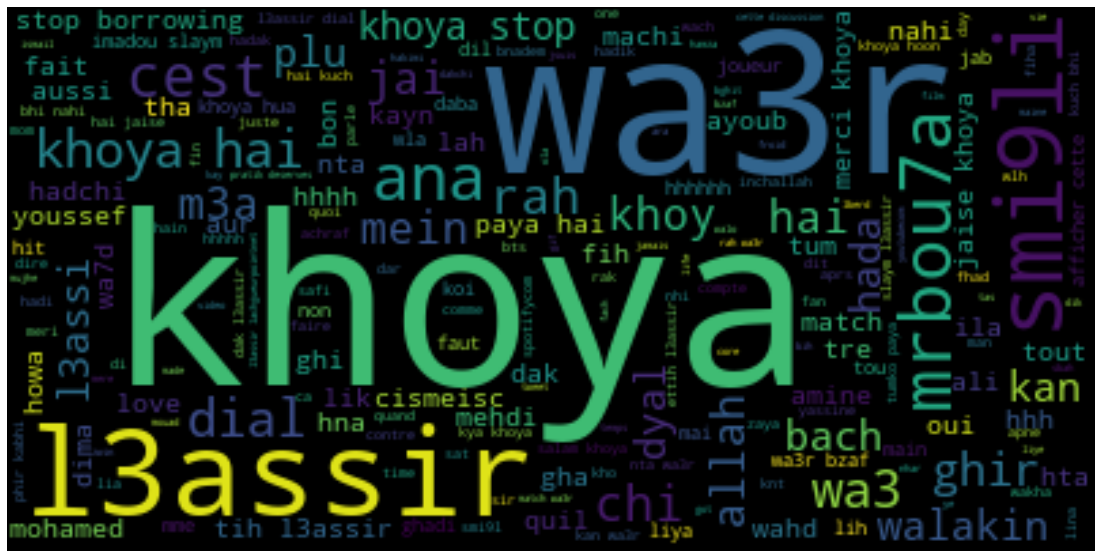

In [20]:
#We check again the voccabulary of each language the results this time are satisfying
#liste of Darija keywords
language_list=dataset['Language'].unique().tolist()
Darija_list=dataset[dataset['Language']=='Darija']['detokenized_sents'].tolist()
Darija_docx=' '.join(Darija_list)
plot_wordcloud(Darija_docx) 

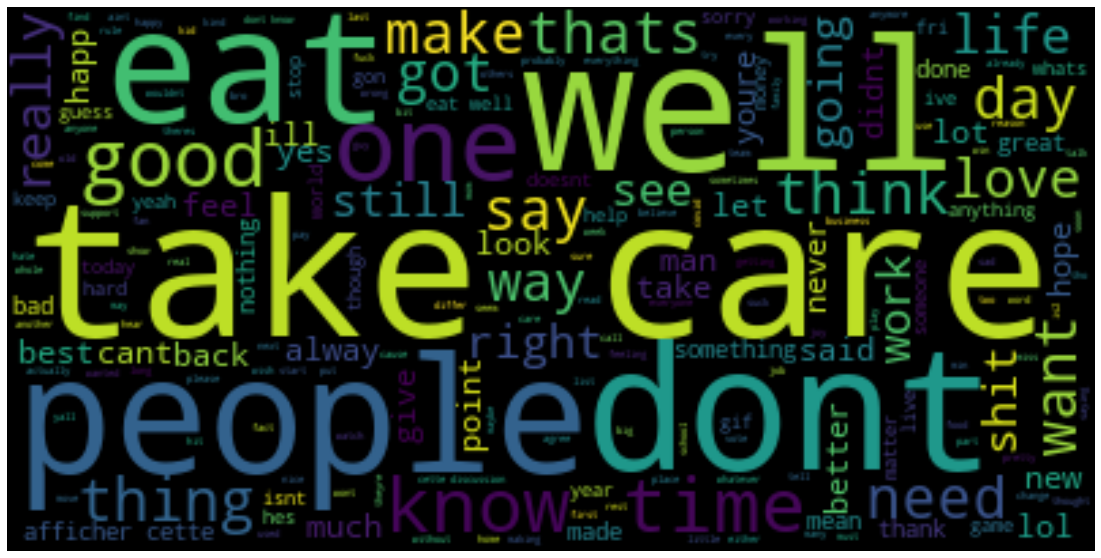

In [21]:
#liste of English keywords 
language_list=dataset['Language'].unique().tolist()
English_list=dataset[dataset['Language']=='English']['detokenized_sents'].tolist()
English_docx=' '.join(English_list)
plot_wordcloud(English_docx) 

In [22]:
#Dataset partition (trainning & testing data)
import numpy as np
from sklearn.model_selection import train_test_split

X=dataset['detokenized_sents']
y=dataset['Language']
#we used  80% for training data and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

9637
2410
9637
2410


## 3.1- Vectorization

### 3.1.1 Uni-gram

In [23]:
# Extract Unigrams
from sklearn.feature_extraction.text import CountVectorizer
unigramVectorizer = CountVectorizer(analyzer='char', ngram_range=(1,1))
X_unigram_train_raw = unigramVectorizer.fit_transform(X_train)
X_unigram_test_raw = unigramVectorizer.transform(X_test)

#getFreatures
unigramFeatures = unigramVectorizer.get_feature_names()

print('Number of unigrams in training set:', len(unigramFeatures))

Number of unigrams in training set: 32


Our corpus is composed of 32 different features, represented in this list:

In [25]:
unigramFeatures

[' ',
 '2',
 '3',
 '5',
 '7',
 '9',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [24]:
#Distribution of uni-grams through the laguages
def train_lang_dict(X_raw_counts, y_train):
    lang_dict = {}
    for i in range(len(y_train)):
        lang = y_train[i]
        v = np.array(X_raw_counts[i])
        if not lang in lang_dict:
            lang_dict[lang] = v
        else:
            lang_dict[lang] += v
            
    # to relative
    for lang in lang_dict:
        v = lang_dict[lang]
        lang_dict[lang] = v / np.sum(v)
        
    return lang_dict

language_dict_unigram = train_lang_dict(X_unigram_train_raw.toarray(), y_train.values)

# Collect relevant chars per language
def getRelevantCharsPerLanguage(features, language_dict, significance=1e-4):
    relevantCharsPerLanguage = {}
    for lang in languages:
        chars = []
        relevantCharsPerLanguage[lang] = chars
        v = language_dict[lang]
        for i in range(len(v)):
            if v[i] > significance:
                chars.append(features[i])
    return relevantCharsPerLanguage



In [27]:
language_dict_unigram

{'French': array([1.37218131e-01, 4.64282138e-04, 2.70072616e-04, 1.45657141e-04,
        7.28285706e-05, 4.24833329e-05, 7.61028218e-02, 1.04357273e-02,
        3.82167924e-02, 2.50257176e-02, 9.70683466e-02, 1.74727879e-02,
        1.09667689e-02, 1.05115904e-02, 7.51924647e-02, 5.65331780e-03,
        2.15147736e-03, 3.85657627e-02, 3.32158973e-02, 4.94718411e-02,
        5.59293077e-02, 2.86732152e-02, 9.55874990e-03, 7.08197159e-02,
        6.76638112e-02, 6.46292874e-02, 4.82398245e-02, 1.45232308e-02,
        2.14844283e-03, 3.76584401e-03, 3.16197378e-03, 2.62182854e-03]),
 'English': array([1.37524088e-01, 5.03832066e-04, 3.45694994e-04, 1.83880316e-04,
        1.50781859e-04, 7.72297327e-05, 7.40228600e-02, 1.46331955e-02,
        2.92700687e-02, 3.21275688e-02, 9.57207373e-02, 1.32945468e-02,
        2.50886303e-02, 3.28998661e-02, 6.61895585e-02, 3.04505803e-03,
        1.63028288e-02, 4.73050501e-02, 2.78394798e-02, 5.47080716e-02,
        5.73964018e-02, 2.17861398e-02, 9

The 32 features are distributed among the languages as follows:

In [25]:
relevantCharsPerLanguage = getRelevantCharsPerLanguage(unigramFeatures, language_dict_unigram)
# Print number of unigrams per language
for lang in languages:    
    print(lang, len(relevantCharsPerLanguage[lang]))

English 31
Darija 32
French 30


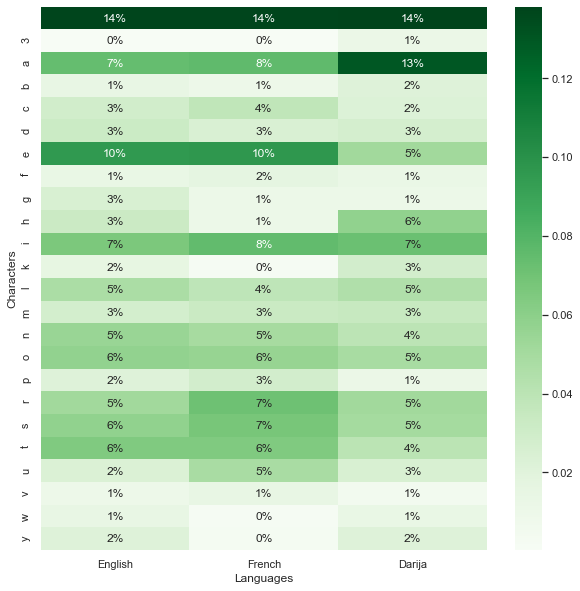

In [26]:
# get most common chars for a few European languages
europeanLanguages = [ 'English', 'French', 'Darija']
relevantChars_OnePercent = getRelevantCharsPerLanguage(unigramFeatures, language_dict_unigram, 1e-2)

# collect and sort chars
europeanCharacters = []
for lang in europeanLanguages:
    europeanCharacters += relevantChars_OnePercent[lang]
europeanCharacters = list(set(europeanCharacters))
europeanCharacters.sort()

# build data
indices = [unigramFeatures.index(f) for f in europeanCharacters]
data = []
for lang in europeanLanguages:
    data.append(language_dict_unigram[lang][indices])

#build dataframe
df = pd.DataFrame(np.array(data).T, columns=europeanLanguages, index=europeanCharacters)
df.index.name = 'Characters'
df.columns.name = 'Languages'

# plot heatmap
import seaborn as sn
import matplotlib.pyplot as plt
sn.set(font_scale=0.8) # for label size
sn.set(rc={'figure.figsize':(10, 10)})
sn.heatmap(df, cmap="Greens", annot=True, annot_kws={"size": 12}, fmt='.0%')# font size
plt.show()

**Note: in our case using uni-gram won't be usefull since all languages use almost the same letters**

### 3.1.2 Bi-gram

In [27]:
# number of bigrams
from sklearn.feature_extraction.text import CountVectorizer
bigramVectorizer = CountVectorizer(analyzer='char', ngram_range=(2,2))
X_bigram_raw = bigramVectorizer.fit_transform(X_train)
bigramFeatures = bigramVectorizer.get_feature_names()
print('Number of bigrams', len(bigramFeatures))

Number of bigrams 941


Bi-gram helped us to increase the number of features used in our corpus from 32 in uni-gram to 941 features listed bellow

Note: To determine the significant combinations for each language, the notion of signiphicance is introduced as the minimum weight associated with the representative feature in a language in our case significance is equal to 0.01

In [31]:
# top bigrams (>1%) for each language
language_dict_bigram = train_lang_dict(X_bigram_raw.toarray(), y_train.values)
relevantCharsPerLanguage = getRelevantCharsPerLanguage(bigramFeatures, language_dict_bigram, significance=1e-2)
print('Darija', relevantCharsPerLanguage['Darija'])
print('French', relevantCharsPerLanguage['French'])
print('English', relevantCharsPerLanguage['English'])


Darija [' k', ' l', ' m', 'a ', 'an', 'ch', 'e ', 'ha', 'ho', 'i ', 'kh', 'ou', 'r ', 'ya']
French [' c', ' d', ' f', ' p', ' t', 'ai', 'an', 'e ', 'er', 'es', 'is', 'on', 'ou', 'r ', 'ra', 're', 's ', 't ', 'te']
English [' c', ' s', ' t', 'an', 'd ', 'e ', 'er', 'in', 'ng', 'on', 're', 's ', 't ', 'y ']


Note: we can see even if it's better that unigrams but we always have some features that are the same in the 3 languages. However our objective is to find features that makes each language (unique for this language) so we can distiguich between them. Alternatively, we could also use a mixture of Uni-Grams and Bi-Grams, restricted on the most frequently used ones.

### # **3.1.1 Mixture Uni-gram & Bi-gram using top 1% features**

In [1]:
#When we restrict ourselves to a limited number of features, it is important, that we will capture details for each language.

In [28]:
# Uni- & Bi-Gram Mixture CountVectorizer for top 1% features
from sklearn.feature_extraction.text import CountVectorizer

top1PrecentMixtureVectorizer = CountVectorizer(analyzer='char', ngram_range=(1,2), min_df=1e-2)
X_top1Percent_train_raw = top1PrecentMixtureVectorizer.fit_transform(X_train)
X_top1Percent_test_raw = top1PrecentMixtureVectorizer.transform(X_test)

language_dict_top1Percent = train_lang_dict(X_top1Percent_train_raw.toarray(), y_train.values)

top1PercentFeatures = top1PrecentMixtureVectorizer.get_feature_names()
print('Length of features', len(top1PercentFeatures))
print('')

#Unique features per language
relevantChars_Top1Percent = getRelevantCharsPerLanguage(top1PercentFeatures, language_dict_top1Percent, 1e-5)
for lang in relevantChars_Top1Percent:
    print("{}: {}".format(lang, len(relevantChars_Top1Percent[lang])))

Length of features 471

English: 459
Darija: 471
French: 454


In [79]:
dataset['Text'][12000]

'tih l3assir real madrid lopetegui auraisje vir si javais sign autre club real madrid cest bonne question'

In [80]:
test3 = top1PrecentMixtureVectorizer.transform([dataset['Text'][12000]])
var_test3=toNumpyArray(test3)
new_var= np.array(test3.toarray()[:,relevantColumnIndices])
new_var

array([[ 2,  0,  2,  1,  2,  0,  0,  0,  1,  0,  1,  0,  5,  1,  2,  0,
         0, 10,  2,  2,  0,  0,  2,  3,  2,  8,  0,  0,  0,  0,  1,  2,
        16,  0,  0,  0,  0,  8,  0,  0,  1,  0,  2,  9,  0,  5,  2,  2,
         2,  2,  1,  1,  0,  2,  0,  1,  2,  0,  2,  2,  1,  0,  0,  0,
         2, 11,  0,  0,  1,  1,  1,  0,  1,  5,  2,  0,  1,  4,  2,  3,
         0,  3,  1,  0,  0,  0,  2,  4,  0,  2,  2,  2]], dtype=int64)

Well, we can restrict ourselves to the top 60 Uni- & Bi-Grams per language.This will lead to max 3 * 60 = 180 features

In [29]:
def getRelevantGramsPerLanguage(features, language_dict, top=60):
    relevantGramsPerLanguage = {}
    for lang in languages:
        chars = []
        relevantGramsPerLanguage[lang] = chars
        v = language_dict[lang]
        sortIndex = (-v).argsort()[:top]
        for i in range(len(sortIndex)):
            chars.append(features[sortIndex[i]])
    return relevantGramsPerLanguage

top60PerLanguage_dict = getRelevantGramsPerLanguage(top1PercentFeatures, language_dict_top1Percent)

# top60
allTop60 = []
for lang in top60PerLanguage_dict:
    allTop60 += set(top60PerLanguage_dict[lang])

top60 = list(set(allTop60))
    
print('All items:', len(allTop60))
print('Unique items:', len(top60))

All items: 180
Unique items: 92


And here'are the top 60 used features in our dataset

In [78]:

print('Darija', top60PerLanguage_dict['Darija'])
print('French', top60PerLanguage_dict['French'])
print('English',top60PerLanguage_dict['English'])


Darija [' ', 'a', 'i', 'h', 'r', 'e', 's', 'o', 'l', 't', 'n', 'm', 'k', 'd', 'u', 'a ', 'c', 'y', 'b', 'e ', 'w', 'i ', 'ha', ' k', 'f', 'r ', '3', 'p', ' l', ' m', 'g', 'ho', 'an', 'ya', 'ou', 'ch', 'kh', 'al', ' s', 'ma', 'h ', 'in', ' t', 'ss', 's ', 'la', 'as', 'ar', 'ra', ' b', 'n ', 'ir', 'wa', 't ', ' w', 'j', ' d', ' a', ' h', 'ah']
French [' ', 'e', 'a', 'i', 'r', 's', 't', 'o', 'n', 'u', 'l', 'c', 'e ', 'm', 'p', 's ', 'd', 't ', 'f', ' c', 're', 'es', 'an', 'v', ' p', 'on', 'ai', 'er', 'is', ' d', 'r ', 'te', 'ra', 'g', 'h', 'b', ' t', 'ou', ' f', 'q', ' s', 'co', 'le', 'qu', 'it', ' m', 'in', 'ti', ' a', 'st', 'n ', 'ce', 'i ', 'ar', 'ur', 'nt', 'me', 'ir', 'eu', 'al']
English [' ', 'e', 'a', 'i', 't', 's', 'o', 'n', 'r', 'l', 'h', 'd', 'c', 'm', 'g', 'u', 'e ', 'p', 'y', 'in', 's ', 'k', 't ', 'b', 'w', ' s', 'f', 'er', 'on', ' t', 're', 'd ', 'y ', ' c', 'an', 'ng', 'v', 'es', 'ar', 'n ', 'st', 'at', 'g ', ' p', ' w', ' d', ' m', 'ea', 'th', 'te', ' l', ' a', 'al', 'ti',

In [ ]:
#So, when dealing with the top-60-approach on these 3 languages, we will effectively use 92 features only.
#Conclusion: From a theoretical perspective, it is most efficient to use a Mixture of the most common Uni-Grams and Bi-Grams.

Now, let's build the data set for the models, based on our 92 features

In [30]:
# getRelevantColumnIndices
def getRelevantColumnIndices(allFeatures, selectedFeatures):
    relevantColumns = []
    for feature in selectedFeatures:
        relevantColumns = np.append(relevantColumns, np.where(allFeatures==feature))
    return relevantColumns.astype(int)

relevantColumnIndices = getRelevantColumnIndices(np.array(top1PercentFeatures), top60)


X_top60_train_raw = np.array(X_top1Percent_train_raw.toarray()[:,relevantColumnIndices])
X_top60_test_raw = X_top1Percent_test_raw.toarray()[:,relevantColumnIndices] 

print('train shape', X_top60_train_raw.shape)
print('test shape', X_top60_test_raw.shape)

train shape (9637, 92)
test shape (2410, 92)


## 4- Modeling

## Naive Bayes

Now, we can apply the Naive Bayes on our different feature sets: .Unigram (X_unigram_train_raw) .Mixture Top 1% (X_top1Percent_train_raw) .Mixture Top 60 (X_top60_train_raw)

In [31]:
# Define some functions for our purpose

from sklearn.preprocessing import normalize
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sn
import matplotlib.pyplot as plt
import scipy

# Utils for conversion of different sources into numpy array
def toNumpyArray(data):
    data_type = type(data)
    if data_type == np.ndarray:
        return data
    elif data_type == list:
        return np.array(data_type)
    elif data_type == scipy.sparse.csr.csr_matrix:
        return data.toarray()
    print(data_type)
    return None
def normalizeData(train, test):
    train_result = normalize(train, norm='l2', axis=1, copy=True, return_norm=False)
    test_result = normalize(test, norm='l2', axis=1, copy=True, return_norm=False)
    return train_result, test_result

def applyNaiveBayes(X_train, y_train, X_test):
    trainArray = toNumpyArray(X_train)
    testArray = toNumpyArray(X_test)
    clf = MultinomialNB()
    clf.fit(trainArray, y_train)
    y_predict = clf.predict(testArray)
    return y_predict,clf

def plot_F_Scores(y_test, y_predict):
    f1_micro = f1_score(y_test, y_predict, average='micro')
    f1_macro = f1_score(y_test, y_predict, average='macro')
    f1_weighted = f1_score(y_test, y_predict, average='weighted')
    print("F1: {} (micro), {} (macro), {} (weighted)".format(f1_micro, f1_macro, f1_weighted))

def plot_Confusion_Matrix(y_test, y_predict, color="Blues"):
    allLabels = list(set(list(y_test) + list(y_predict)))
    allLabels.sort()
    confusionMatrix = confusion_matrix(y_test, y_predict, labels=allLabels)
    unqiueLabel = np.unique(allLabels)
    df_cm = pd.DataFrame(confusionMatrix, columns=unqiueLabel, index=unqiueLabel)
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    
    sn.set(font_scale=0.8) # for label size
    sn.set(rc={'figure.figsize':(15, 15)})
    sn.heatmap(df_cm, cmap=color, annot=True, annot_kws={"size": 12}, fmt='g')# font size
    plt.show()

### Uni-grams

F1: 0.8402489626556016 (micro), 0.8357970370535384 (macro), 0.8387990185718953 (weighted)


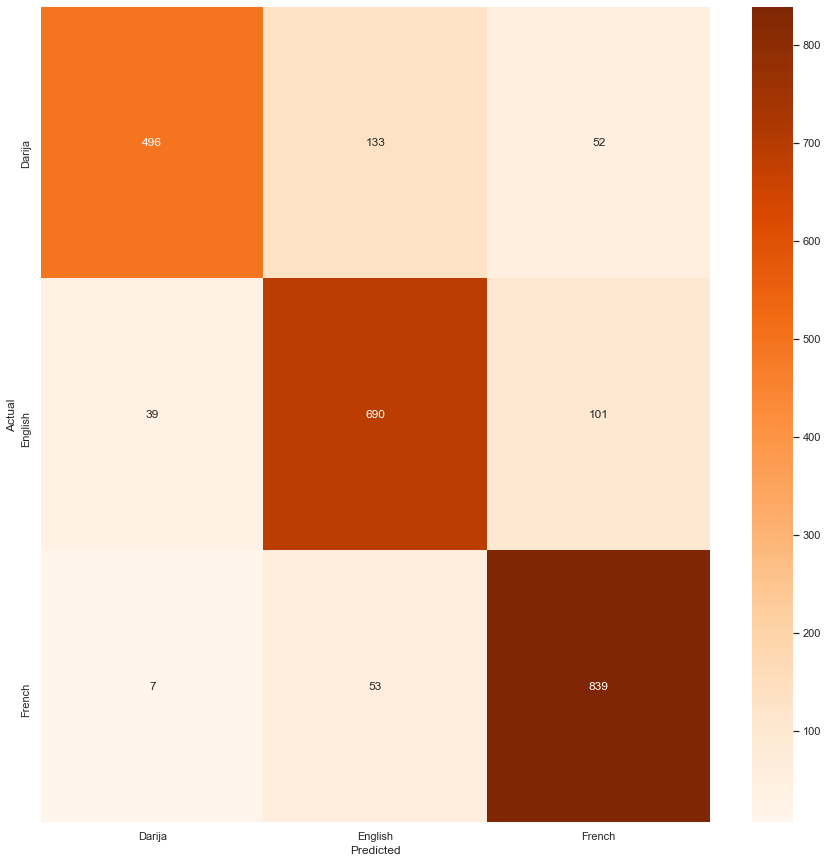

In [32]:
# Unigrams
X_unigram_train, X_unigram_test = normalizeData(X_unigram_train_raw, X_unigram_test_raw)
y_predict_nb_unigram,clf1 = applyNaiveBayes(X_unigram_train, y_train, X_unigram_test)
plot_F_Scores(y_test, y_predict_nb_unigram)
plot_Confusion_Matrix(y_test, y_predict_nb_unigram, "Oranges")

### Top 1% Mixture

F1: 0.9178423236514522 (micro), 0.9164653731813126 (macro), 0.9176212136387736 (weighted)


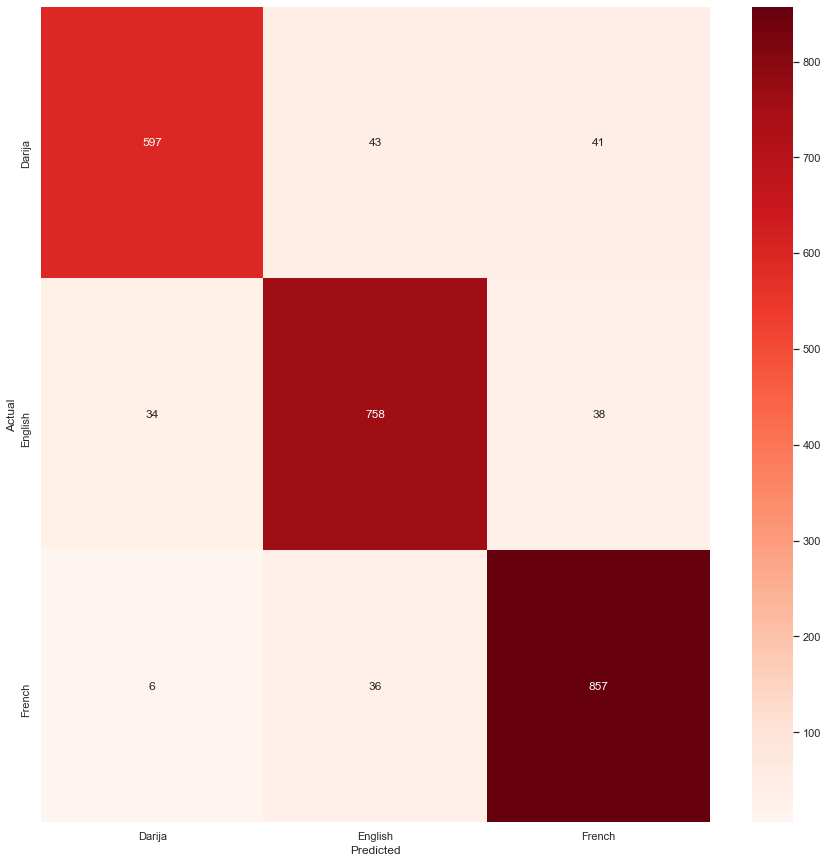

In [33]:
# Top 1%
X_top1Percent_train, X_top1Percent_test = normalizeData(X_top1Percent_train_raw, X_top1Percent_test_raw)
y_predict_nb_top1Percent,clf2 = applyNaiveBayes(X_top1Percent_train, y_train, X_top1Percent_test)
plot_F_Scores(y_test, y_predict_nb_top1Percent)
plot_Confusion_Matrix(y_test, y_predict_nb_top1Percent, "Reds")

### Top 60 Mixture

F1: 0.8892116182572614 (micro), 0.8877413106027235 (macro), 0.8889191792260633 (weighted)


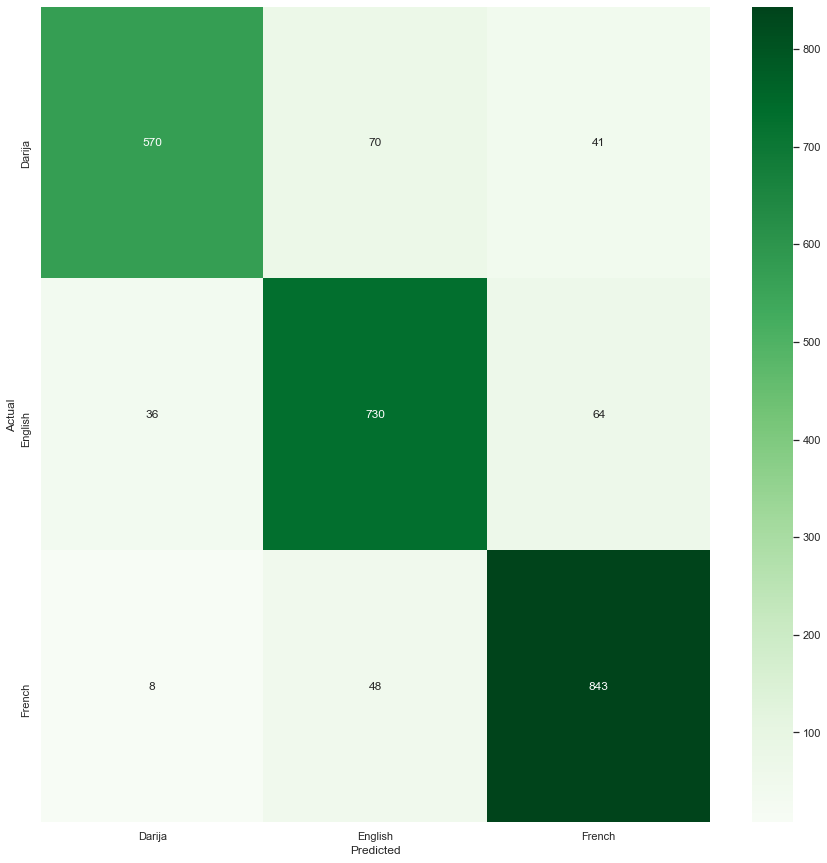

In [34]:
# Top 60
X_top60_train, X_top60_test = normalizeData(X_top60_train_raw, X_top60_test_raw)
y_predict_nb_top60,clf3 = applyNaiveBayes(X_top60_train, y_train, X_top60_test)
plot_F_Scores(y_test, y_predict_nb_top60)
plot_Confusion_Matrix(y_test, y_predict_nb_top60, "Greens")

# Comparison
**For Naive Bayes we achieve the following scores for F1 (weighted):

Unigram: 0.8387990185718953 (using 32 features)

Top 1% Mixture: 0.9176212136387736 (471 features)

Top 60 Mixture: 0.8889191792260633 (92 features)**

we notice that top 1% Mixture represent languages the most comparing with unigrams and top 60.

In [36]:
from sklearn.metrics import classification_report

In [37]:
print('Unigram')
print()
print(classification_report( y_predict_nb_unigram , y_test))

Unigram

              precision    recall  f1-score   support

      Darija       0.73      0.92      0.81       542
     English       0.83      0.79      0.81       876
      French       0.93      0.85      0.89       992

    accuracy                           0.84      2410
   macro avg       0.83      0.85      0.84      2410
weighted avg       0.85      0.84      0.84      2410



In [38]:
print('Top 1% Mixture')
print()
print(classification_report(  y_predict_nb_top1Percent , y_test))

Top 1% Mixture

              precision    recall  f1-score   support

      Darija       0.88      0.94      0.91       637
     English       0.91      0.91      0.91       837
      French       0.95      0.92      0.93       936

    accuracy                           0.92      2410
   macro avg       0.91      0.92      0.92      2410
weighted avg       0.92      0.92      0.92      2410



In [39]:
print('Top 60 Mixture')
print()
print(classification_report(  y_predict_nb_top60 , y_test))

Top 60 Mixture

              precision    recall  f1-score   support

      Darija       0.84      0.93      0.88       614
     English       0.88      0.86      0.87       848
      French       0.94      0.89      0.91       948

    accuracy                           0.89      2410
   macro avg       0.88      0.89      0.89      2410
weighted avg       0.89      0.89      0.89      2410



## K Nearest Neighbor

### Unigrams

The default for k=5. Let's stick to that default

F1: 0.8423236514522822 (micro), 0.839869043979636 (macro), 0.8414954363703842 (weighted)


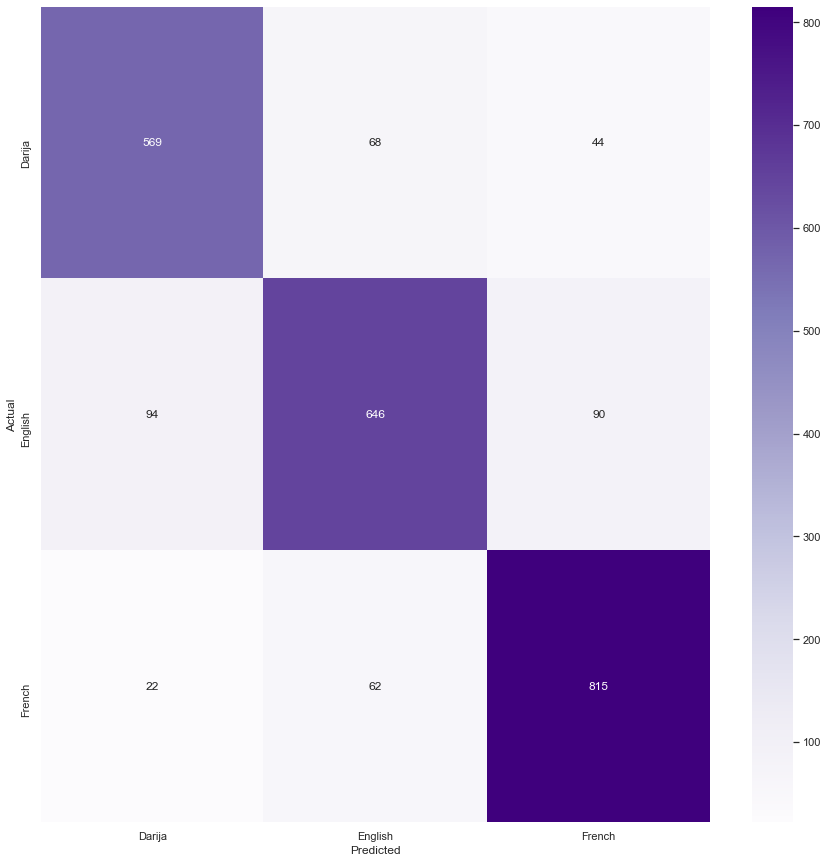

In [40]:
from sklearn.neighbors import KNeighborsClassifier

def applyNearestNeighbour(X_train, y_train, X_test):
    trainArray = toNumpyArray(X_train)
    testArray = toNumpyArray(X_test)
    
    clf = KNeighborsClassifier()
    clf.fit(trainArray, y_train)
    y_predict = clf.predict(testArray)
    return y_predict,clf

#Unigrams
y_predict_knn_unigram,clf4 = applyNearestNeighbour(X_unigram_train, y_train, X_unigram_test)
plot_F_Scores(y_test, y_predict_knn_unigram)
plot_Confusion_Matrix(y_test, y_predict_knn_unigram, "Purples")


### choose the best value of K

Text(0, 0.5, "Taux d'erreurs")

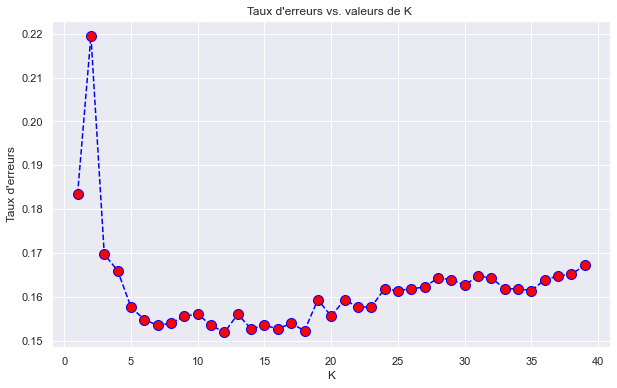

In [41]:
#Choose the right value of k suitable, for this we will create a loop that trains various KNN models with different
#values of k, then calculate the error rate for each of these models and put them in a list in order to compare them
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_unigram_train, y_train)
    pred_i = knn.predict( X_unigram_test)
    error_rate.append(np.mean(pred_i != y_test))
 

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title("Taux d'erreurs vs. valeurs de K ")
plt.xlabel('K')
plt.ylabel("Taux d'erreurs")

we can choose 12 as the best value of K

F1: 0.8473029045643153 (micro), 0.8442564263837182 (macro), 0.8461876257779132 (weighted)


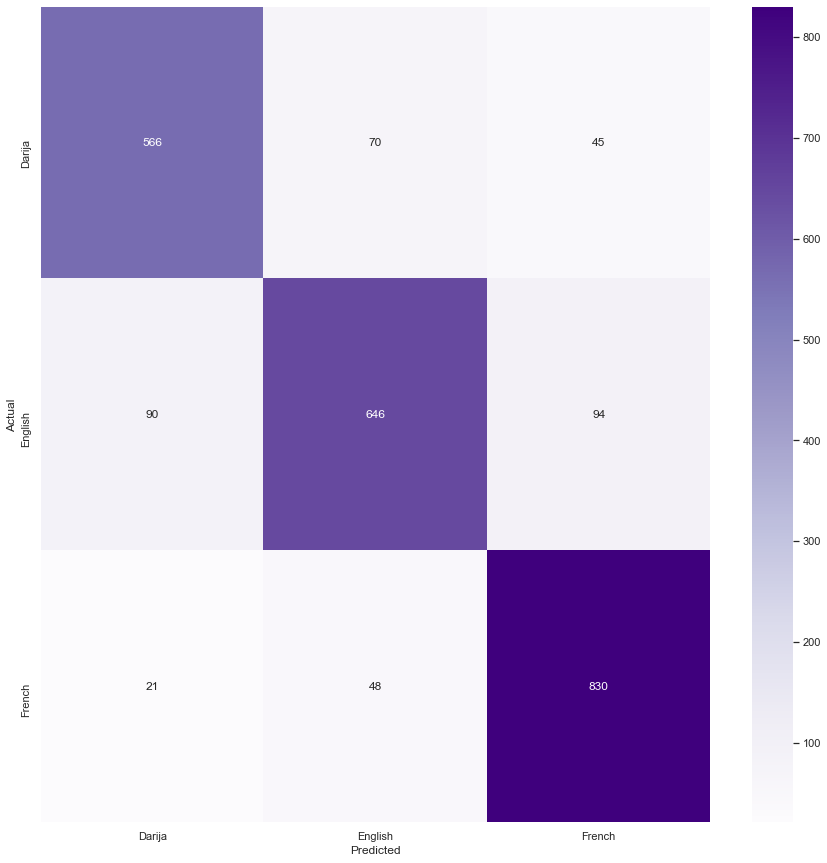

In [42]:
#Uni-grams
from sklearn.neighbors import KNeighborsClassifier

def applyNearestNeighbour(X_train, y_train, X_test):
    trainArray = toNumpyArray(X_train)
    testArray = toNumpyArray(X_test)
    
    clf = KNeighborsClassifier(n_neighbors=12)
    clf.fit(trainArray, y_train)
    y_predict = clf.predict(testArray)
    return y_predict,clf

#Unigrams
y_predict_knn_unigram,clf4 = applyNearestNeighbour(X_unigram_train, y_train, X_unigram_test)
plot_F_Scores(y_test, y_predict_knn_unigram)
plot_Confusion_Matrix(y_test, y_predict_knn_unigram, "Purples")


### Top 1% Mixture

F1: 0.895850622406639 (micro), 0.893545503100305 (macro), 0.8952434847125752 (weighted)


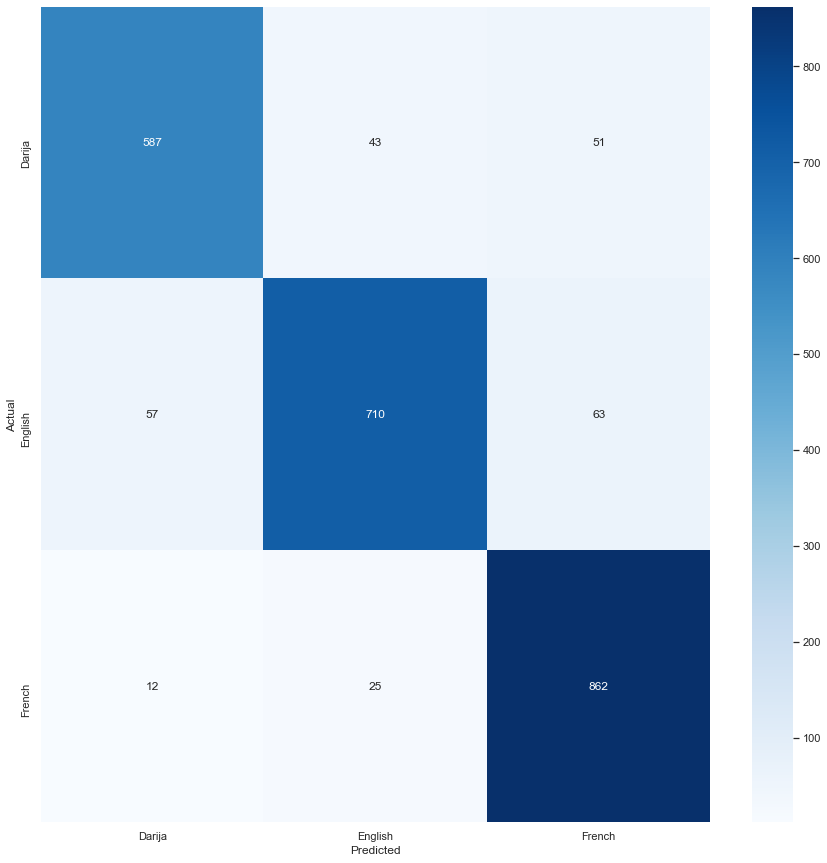

In [43]:
# Top 1%
y_predict_knn_top1P,clf5 = applyNearestNeighbour(X_top1Percent_train, y_train,X_top1Percent_test)
plot_F_Scores(y_test, y_predict_knn_top1P)
plot_Confusion_Matrix(y_test, y_predict_knn_top1P, "Blues")

### Top 60 Mixture

F1: 0.8887966804979254 (micro), 0.8863013549114247 (macro), 0.8882959316769268 (weighted)


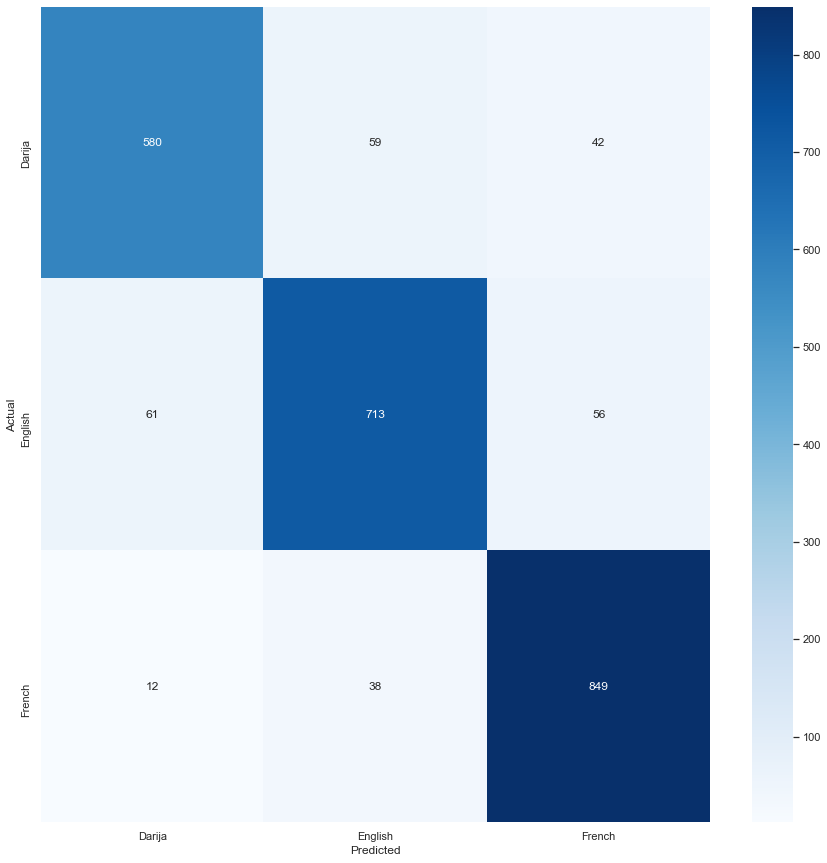

In [44]:
# Top 60
y_predict_knn_top60,clf6 = applyNearestNeighbour(X_top60_train, y_train, X_top60_test)
plot_F_Scores(y_test, y_predict_knn_top60)
plot_Confusion_Matrix(y_test, y_predict_knn_top60, "Blues")

# Comparison
**For KNN we achieve the following scores for F1 (weighted):

Unigram: 0.8470151344064695 (using 32 features)

Top 1% Mixture: 0.8952434847125752 (471 features)

Top 60 Mixture: 0.888294583348349 (92 features)**

in our case, we can see that that top 1% Mixture represent languages the most.

In [45]:
print('Unigram')
print()
print(classification_report( y_predict_knn_unigram, y_test))

Unigram

              precision    recall  f1-score   support

      Darija       0.83      0.84      0.83       677
     English       0.78      0.85      0.81       764
      French       0.92      0.86      0.89       969

    accuracy                           0.85      2410
   macro avg       0.84      0.85      0.84      2410
weighted avg       0.85      0.85      0.85      2410



In [46]:
print('Top 1% Mixture')
print()
print(classification_report( y_predict_knn_top1P , y_test))

Top 1% Mixture

              precision    recall  f1-score   support

      Darija       0.86      0.89      0.88       656
     English       0.86      0.91      0.88       778
      French       0.96      0.88      0.92       976

    accuracy                           0.90      2410
   macro avg       0.89      0.90      0.89      2410
weighted avg       0.90      0.90      0.90      2410



In [47]:
print('Top 60 Mixture')
print()
print(classification_report( y_predict_knn_top60, y_test))

Top 60 Mixture

              precision    recall  f1-score   support

      Darija       0.85      0.89      0.87       653
     English       0.86      0.88      0.87       810
      French       0.94      0.90      0.92       947

    accuracy                           0.89      2410
   macro avg       0.89      0.89      0.89      2410
weighted avg       0.89      0.89      0.89      2410



## Logistic Regression

### Uni-grams

F1: 0.8688796680497926 (micro), 0.8671004401021488 (macro), 0.8685706731912578 (weighted)


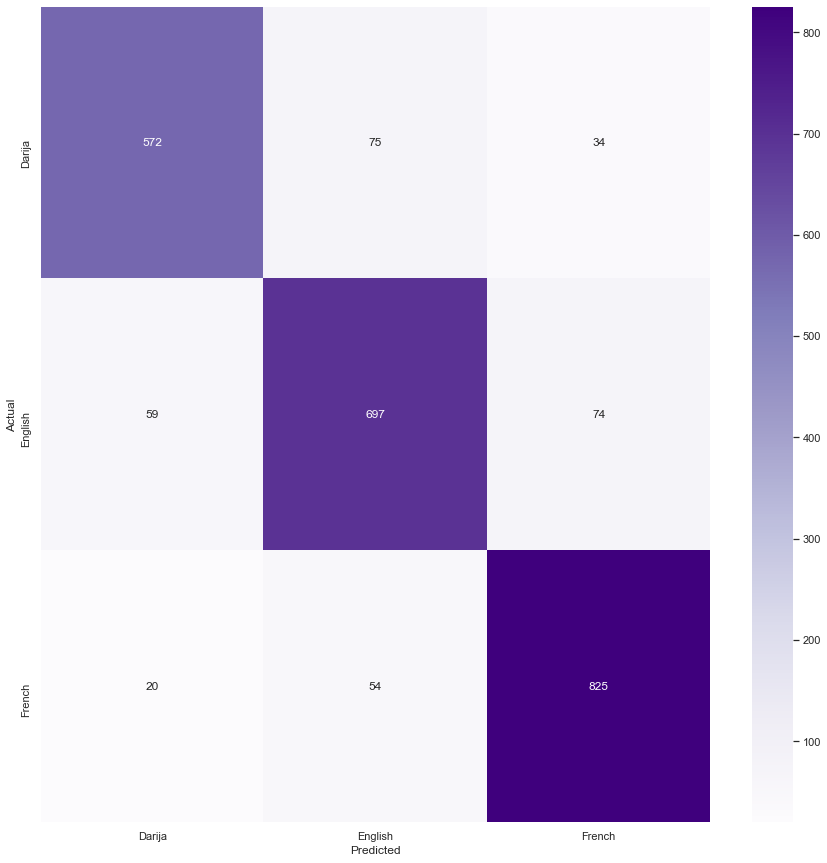

In [48]:
from sklearn.linear_model import LogisticRegression

def applyLogisticRegression(X_train, y_train, X_test):
    trainArray = toNumpyArray(X_train)
    testArray = toNumpyArray(X_test)
    
    clf = LogisticRegression(max_iter=1000)
    clf.fit(trainArray, y_train)
    y_predict = clf.predict(testArray)
    return y_predict,clf

## Unigrams
y_predict_RL_unigram,clf7 = applyLogisticRegression(X_unigram_train, y_train, X_unigram_test)
plot_F_Scores(y_test, y_predict_RL_unigram)
plot_Confusion_Matrix(y_test, y_predict_RL_unigram, "Purples")


### Top 1% Mixture

F1: 0.9394190871369295 (micro), 0.9391849859623806 (macro), 0.9394186585277219 (weighted)


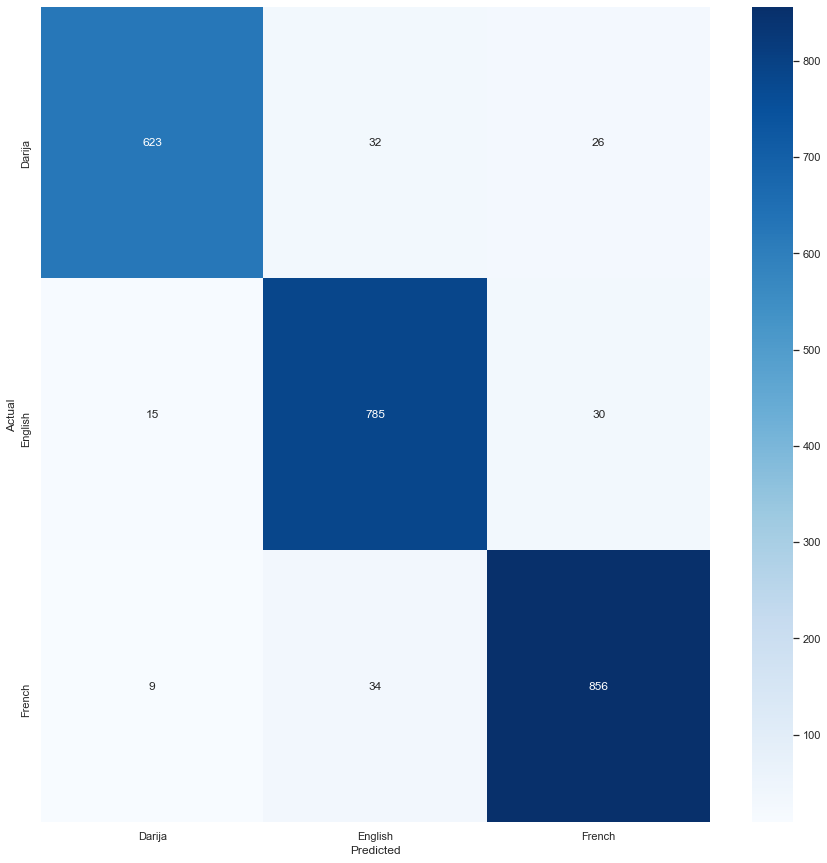

In [49]:
# Top 1%
y_predict_RL_top1P,clf8 = applyLogisticRegression(X_top1Percent_train, y_train,X_top1Percent_test)
plot_F_Scores(y_test, y_predict_RL_top1P)
plot_Confusion_Matrix(y_test, y_predict_RL_top1P, "Blues")

### Top 60 Mixture

F1: 0.9269709543568465 (micro), 0.9264554134063855 (macro), 0.9269944856641448 (weighted)


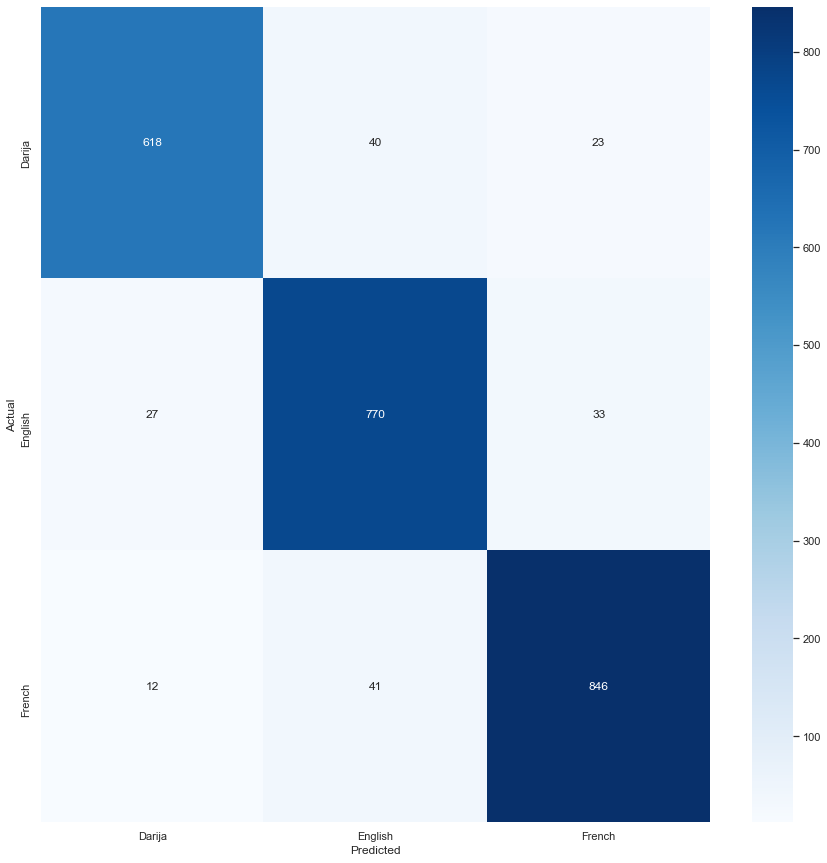

In [50]:
# Top 60
y_predict_RL_top60,clf9 = applyLogisticRegression(X_top60_train, y_train, X_top60_test)
plot_F_Scores(y_test, y_predict_RL_top60)
plot_Confusion_Matrix(y_test, y_predict_RL_top60, "Blues")

# Comparison
**For Logistic Regression we achieve the following scores for F1 (weighted):

Unigram: 0.8685706731912578 (using 32 features)

Top 1% Mixture: 0.9394186585277219 (471 features)

Top 60 Mixture: 0.9269944856641448 (92 features)**

in our case, we can see that that top 1% Mixture represent languages the most.

In [51]:
print('Unigram')
print()
print(classification_report( y_predict_RL_unigram, y_test))

Unigram

              precision    recall  f1-score   support

      Darija       0.84      0.88      0.86       651
     English       0.84      0.84      0.84       826
      French       0.92      0.88      0.90       933

    accuracy                           0.87      2410
   macro avg       0.87      0.87      0.87      2410
weighted avg       0.87      0.87      0.87      2410



In [52]:
print('Top 1% Mixture')
print()
print(classification_report( y_predict_RL_top1P, y_test))

Top 1% Mixture

              precision    recall  f1-score   support

      Darija       0.91      0.96      0.94       647
     English       0.95      0.92      0.93       851
      French       0.95      0.94      0.95       912

    accuracy                           0.94      2410
   macro avg       0.94      0.94      0.94      2410
weighted avg       0.94      0.94      0.94      2410



In [53]:
print('Top 60 Mixture')
print()
print(classification_report( y_predict_RL_top60, y_test))

Top 60 Mixture

              precision    recall  f1-score   support

      Darija       0.91      0.94      0.92       657
     English       0.93      0.90      0.92       851
      French       0.94      0.94      0.94       902

    accuracy                           0.93      2410
   macro avg       0.93      0.93      0.93      2410
weighted avg       0.93      0.93      0.93      2410



**To improve the top 1% and have better result we can use Tunning parameters:**

In [49]:
#Tunning param
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV 
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=clf8, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_top1Percent_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.953720 using {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}


we can see that the score of prediction has improved

## 5-Evaluating

**To choose the final model we applied k-Fold Cross Validation**

In [50]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#k-fold cross validation fct
def ten_fold_cross(model,X_train,y_train):
            cv = KFold(n_splits=10, random_state=1, shuffle=True)
            # create model
            # evaluate model
            scores = cross_val_score(model,  X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
            # report performance
            print(scores)
            print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
            print()
            return np.mean(scores)

#fct to make sure  that the model is well generalized
from sklearn.metrics import accuracy_score
def compare_accuracy_after_and_before_cross(y_test,y_predict,scores):
                    accuracy=accuracy_score(y_test, y_predict)
                    print('before cross validation, accuracy= ',accuracy)
                    print()
                    print('after cross validation, accuracy= ',scores)
                    
                    

In [51]:
#Unigrams NB model
scores=ten_fold_cross(clf1,X_unigram_train, y_train)
compare_accuracy_after_and_before_cross(y_test, y_predict_nb_unigram,scores)

[0.83817427 0.83298755 0.84024896 0.83506224 0.83817427 0.83921162
 0.81639004 0.83385254 0.81931464 0.82554517]
Accuracy: 0.832 (0.008)

before cross validation, accuracy=  0.8402489626556017

after cross validation, accuracy=  0.8318961319872631


we can see that there is no big difference between accuracy before and after cross validation, so our model is not overfitting

In [52]:
#Top 1% NB Model
scores1=ten_fold_cross(clf2,X_top1Percent_train, y_train)
compare_accuracy_after_and_before_cross(y_test, y_predict_nb_top1Percent,scores1) 

[0.90871369 0.9159751  0.906639   0.91078838 0.91804979 0.91390041
 0.90041494 0.91173416 0.91069574 0.91588785]
Accuracy: 0.911 (0.005)

before cross validation, accuracy=  0.9178423236514522

after cross validation, accuracy=  0.9112799084810174


In [53]:
#Top 60 NB Model
scores2=ten_fold_cross(clf3,X_top60_train, y_train)
compare_accuracy_after_and_before_cross(y_test, y_predict_nb_top60,scores2) 

[0.88900415 0.89522822 0.87344398 0.88174274 0.87966805 0.89522822
 0.87863071 0.88161994 0.87642783 0.87642783]
Accuracy: 0.883 (0.007)

before cross validation, accuracy=  0.8892116182572614

after cross validation, accuracy=  0.8827421655183706


In [54]:
#Uni-grams KNN  model
scores3=ten_fold_cross(clf4,X_unigram_train, y_train)
compare_accuracy_after_and_before_cross(y_test, y_predict_knn_unigram,scores3)

[0.83091286 0.83298755 0.83195021 0.84543568 0.83195021 0.83609959
 0.82261411 0.84839045 0.82139148 0.82866044]
Accuracy: 0.833 (0.008)

before cross validation, accuracy=  0.8473029045643153

after cross validation, accuracy=  0.8330392575070127


In [55]:
#Top 1% KNN Model
scores4=ten_fold_cross(clf5,X_top1Percent_train, y_train)
compare_accuracy_after_and_before_cross(y_test, y_predict_knn_top1P,scores4) 

[0.89004149 0.88485477 0.87344398 0.88900415 0.87863071 0.89004149
 0.88589212 0.88888889 0.88577362 0.88681205]
Accuracy: 0.885 (0.005)

before cross validation, accuracy=  0.895850622406639

after cross validation, accuracy=  0.8853383272363766


In [56]:
#Top 60 KNN Model
scores5=ten_fold_cross(clf6,X_top60_train, y_train)
compare_accuracy_after_and_before_cross(y_test, y_predict_knn_top60,scores5) 

[0.88381743 0.88589212 0.87448133 0.87448133 0.86099585 0.87863071
 0.87863071 0.87850467 0.8701973  0.88265836]
Accuracy: 0.877 (0.007)

before cross validation, accuracy=  0.8887966804979253

after cross validation, accuracy=  0.8768289792875825


In [57]:
#Uni-grams Logistic Regression  model
scores6=ten_fold_cross(clf7,X_unigram_train, y_train)
compare_accuracy_after_and_before_cross(y_test, y_predict_RL_unigram,scores6)

[0.86721992 0.87551867 0.86618257 0.86099585 0.87240664 0.87344398
 0.86307054 0.87746625 0.86396677 0.86812046]
Accuracy: 0.869 (0.005)

before cross validation, accuracy=  0.8688796680497926

after cross validation, accuracy=  0.8688391652986216


In [58]:
#Top 1% Logistic Regression Model
scores7=ten_fold_cross(clf8,X_top1Percent_train, y_train)
compare_accuracy_after_and_before_cross(y_test, y_predict_RL_top1P,scores7) 

[0.92946058 0.95020747 0.93775934 0.93153527 0.94190871 0.93568465
 0.92842324 0.9325026  0.92731049 0.94080997]
Accuracy: 0.936 (0.007)

before cross validation, accuracy=  0.9394190871369295

after cross validation, accuracy=  0.9355602306071535


In [59]:
#Top 60 Logistic Regression Model
scores8=ten_fold_cross(clf9,X_top60_train, y_train)
compare_accuracy_after_and_before_cross(y_test, y_predict_RL_top60,scores8) 

[0.91182573 0.93049793 0.90871369 0.91286307 0.9159751  0.92116183
 0.90871369 0.92107996 0.9086189  0.91588785]
Accuracy: 0.916 (0.007)

before cross validation, accuracy=  0.9269709543568465

after cross validation, accuracy=  0.9155337745547929


# Comparaison
**after applying cross validation we found: Uni-grams NB model: 0.8318961319872631

Top 1% NB model: 0.9112799084810174

Top 60 NB model: 0.8827421655183706

Uni-grams KNN model 0.8330392575070127

Top 1% KNN model: 0.8853383272363766

Top 60 KNN model: 0.8768289792875825

Uni-grams LR model 0.8688391652986216

Top 1% LR model: 0.9355602306071535

Top 60 LR model: 0.9155337745547929

we can see that the best model in our case is Logistic Regression using the Top 1% Mixture. we'll use it in the next section to predict new data.**

## Predicting with some more data

In [60]:
#create a function  that takes a text as input and return the sitable laguage 
def detect_language(text):
            #vectorize the text
            test = top1PrecentMixtureVectorizer.transform([text])
            var_test=toNumpyArray(test)
            l=clf8.predict(var_test)
            #Check for the prediction probability
            pred_proba=clf8.predict_proba(var_test)
            pred_percentage_for_all=dict(zip(clf8.classes_,pred_proba[0]))
            print("Prediction using Logistic Regression Top 1%:  : {} , Prediction Score : {}".format(l[0],np.max(pred_proba)))
            print()
            print(pred_percentage_for_all)

In [61]:
#test text in darija
detect_language('la walakin im not sure that she would be hya')

Prediction using Logistic Regression Top 1%:  : Darija , Prediction Score : 0.9999993353025389

{'Darija': 0.9999993353025389, 'English': 6.646974612176889e-07, 'French': 3.068680565308971e-40}


In [62]:
#test text in english
detect_language('hello world im so happy today')

Prediction using Logistic Regression Top 1%:  : English , Prediction Score : 0.999999996227485

{'Darija': 3.772514890108095e-09, 'English': 0.999999996227485, 'French': 1.3622395810795163e-32}


In [63]:
#test text in french
detect_language('je suis tres heureuse aujourd hui, je me sens tres bien')

Prediction using Logistic Regression Top 1%:  : French , Prediction Score : 0.9999999999999898

{'Darija': 1.023896994022277e-14, 'English': 2.3437223270847788e-19, 'French': 0.9999999999999898}


# Error Analysis

In [64]:
def plotTopErrors(y_predict, top=5):
    ys = y_test.values
    Xs = X_test.values
    errorCount = 0
    
    for i in range(len(ys)):
        if not ys[i]==y_predict[i]:
            errorCount += 1
            print("#{}: Expected: {}, Predicted: {}".format(errorCount, ys[i], y_predict[i]))
            print("Text:", Xs[i])
            print("=================================================")
        if errorCount >= top:
            break

In [65]:
plotTopErrors(y_predict_RL_top1P, top=10)

#1: Expected: French, Predicted: English
Text: lefvrier truth social
#2: Expected: Darija, Predicted: English
Text: rolly
#3: Expected: English, Predicted: French
Text: rezali
#4: Expected: French, Predicted: English
Text: echo everything quieter said wom closet fredrik backman anxious people bifido
#5: Expected: French, Predicted: English
Text: tre noy opinions politique
#6: Expected: English, Predicted: Darija
Text: kirah lol
#7: Expected: Darija, Predicted: English
Text: samax ibn ali
#8: Expected: English, Predicted: French
Text: tired taurusit
#9: Expected: English, Predicted: French
Text: gatohit fluf foreigner like cats hot idc afficher cette discussion
#10: Expected: Darija, Predicted: English
Text: youssefd freedom writersabout teacher stud divided race decides unite themetcm9aweeed wa3


# Thank you !